In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython.display import Audio
import csv
from scipy.signal import butter, lfilter

In [2]:
data = []
with open("data/audio/8kHz_sampling/unknown_fs=8kHz_7.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(float(row['y']))  # Convert to int if y is numeric

    file.close()

In [3]:
data

[0.3861,
 4.18689,
 6.00284,
 6.64144,
 13.64589,
 27.2198,
 19.13311,
 1.44734,
 -1.45737,
 5.58345,
 10.99514,
 -1.25995,
 -0.14825,
 8.67521,
 43.58006,
 35.60982,
 24.05723,
 15.48021,
 30.40801,
 42.98582,
 4.64768,
 -0.86476,
 0.39777,
 1.0566,
 0.55562,
 0.57045,
 -1.41384,
 11.86275,
 31.33261,
 8.69834,
 1.02612,
 6.02993,
 8.39426,
 11.7627,
 5.91224,
 11.13752,
 10.05894,
 11.82626,
 13.04391,
 4.71929,
 9.85283,
 20.95438,
 18.16039,
 2.29692,
 0.06952,
 0.50703,
 2.0636,
 8.81596,
 7.67889,
 19.50935,
 10.69542,
 5.67815,
 20.83341,
 16.59926,
 6.26839,
 4.97348,
 10.68921,
 24.08014,
 23.85635,
 7.75224,
 4.97832,
 6.00868,
 23.98191,
 15.67963,
 3.18513,
 1.09329,
 23.51147,
 19.3426,
 -1.02149,
 1.38023,
 16.49569,
 23.5594,
 2.73022,
 -0.79153,
 10.12195,
 22.83519,
 8.42843,
 1.9568,
 -2.78738,
 18.7387,
 27.03923,
 1.92111,
 0.21695,
 2.20771,
 23.89385,
 10.86974,
 -1.60932,
 5.80249,
 19.6622,
 26.81659,
 7.0673,
 2.14206,
 5.54548,
 13.95289,
 8.77542,
 -0.48766,


In [4]:
len(data)

7999

In [5]:
data = np.array(data, dtype=np.float32)

In [6]:
len(data)

7999

In [7]:
Audio(data, rate=8000, autoplay=True)

In [8]:
resampled = librosa.resample(data, orig_sr=8e3, target_sr=40e3)

In [9]:
Audio(resampled[int(3e3):int(19e3)], rate=40000)

In [10]:
selected = resampled[int(6e3):int(22e3)]

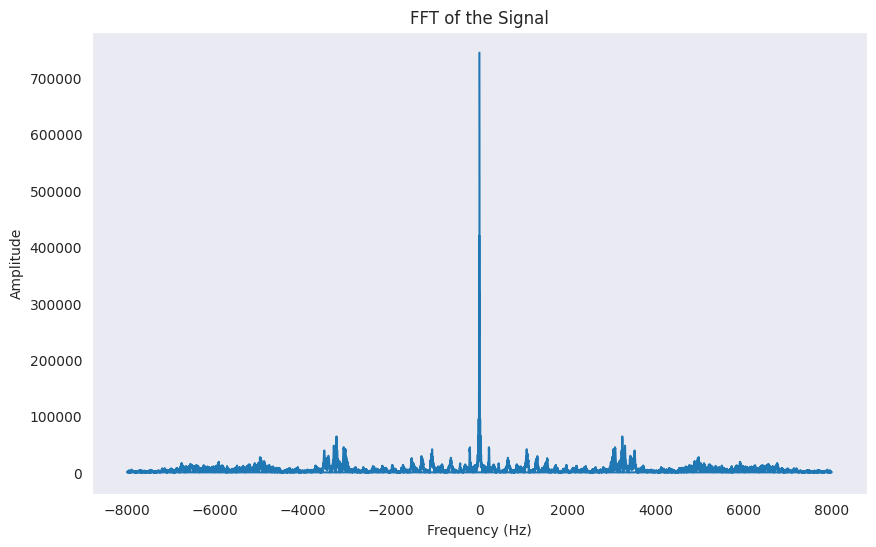

In [11]:
fft_result = np.fft.fft(abs(data))
fft_freqs = np.fft.fftfreq(len(data), d=1/16000)  # Frequency bins

# Plot the FFT
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:16000 // 2], np.abs(fft_result)[:16000 // 2])  # One-sided spectrum
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [12]:
selected /= np.max(selected)

# Filter raw data with bufferworth filter

In [13]:
fs = 16e3
cutoff = 4e3
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(3, normal_cutoff, btype='lowpass', analog=False)

y = lfilter(b, a, data)
y = [0 if item is None else item for item in y]
y = np.array(y, dtype=np.float32)

In [14]:
contains_none = any(item is None for item in y)

print(contains_none)

False


# Highpass filter

In [15]:
fs = 16e3
cutoff = 200
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(6, normal_cutoff, btype='highpass', analog=False)

y_highpass = lfilter(b, a, y)
y_highpass = [0 if item is None else item for item in y_highpass]
y_highpass= np.array(y_highpass, dtype=np.float32)

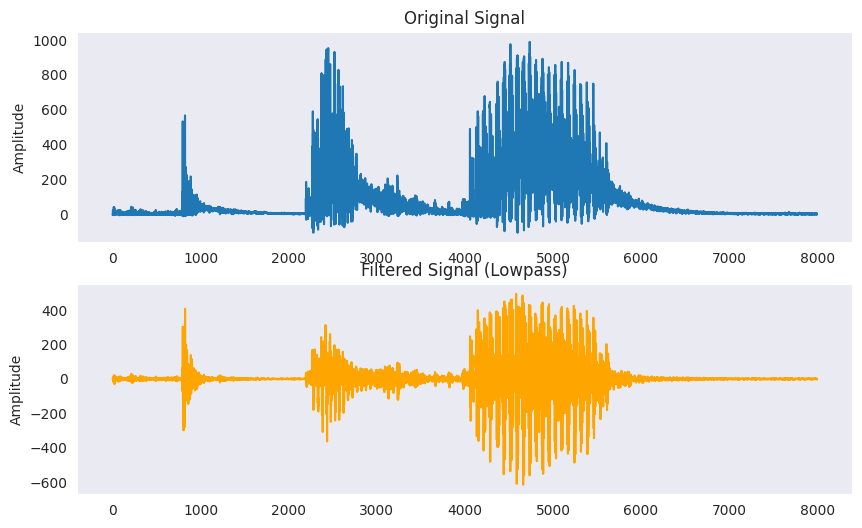

In [16]:
# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Signal')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(y_highpass, label='Filtered Signal', color='orange')
plt.title('Filtered Signal (Lowpass)')
plt.ylabel('Amplitude')
plt.grid()

In [17]:
Audio(y_highpass, rate=8e3)

D shape: (129, 63)


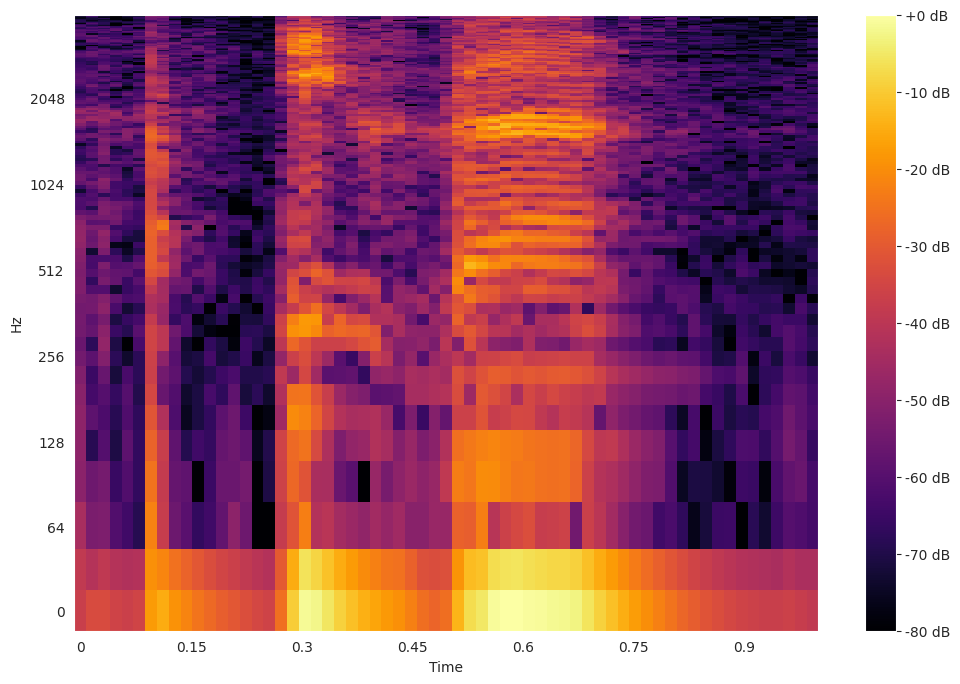

In [18]:
D = librosa.stft(data, n_fft=256, hop_length=128, window='hann')

print(f"D shape: {D.shape}")

# Convert the complex-valued STFT to a magnitude spectrogram
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

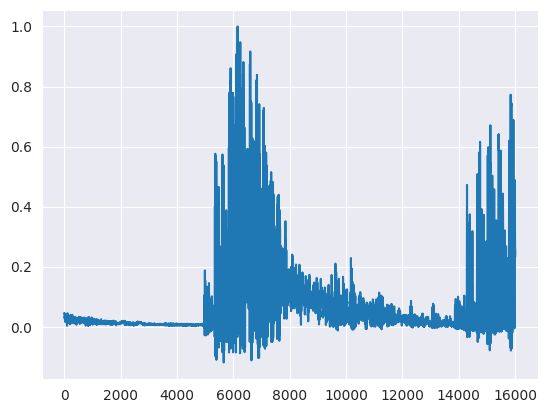

In [19]:
plt.plot(selected)